# Определение потенциально популярного продукта. Спланировать рекламные компании.
Нужно выявить определяющие успешность игры закономерности


## Шаг 1. Открыть файл с данными и изучить общую информацию


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
try:
    data = pd.read_csv('/Users/AleksandrKlukin/Desktop/Сборный проект 1/games.csv')

except:    
    
    data = pd.read_csv('/datasets/games.csv')

 

data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
Name,0.01
Platform,0
Year_of_Release,1.61
Genre,0.01
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,51.32
User_Score,40.09


### Вывод

В нашем распроряжении данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы, а так же сборы по регионам.При первом взгляде на данные из таблиц можно заметить неверные форматы некоторых данных и ошибки:
- В некотрых столбцах имеются пропуски
- В стоблце User_Score неверно указан тип данных

## Шаг 2. Подготовка данных


In [9]:
data.columns = data.columns.str.lower()
data = data.replace('K-A','E')
data['year_of_release'] = data['year_of_release'].fillna(data.groupby('name')['year_of_release'].transform('max'))
data['year_of_release'] = data['year_of_release'].fillna(1900).astype(int)
data = data.replace('tbd',np.nan)
data['user_score'] = data['user_score'].astype(float)
data['rating'] = data['rating'].fillna('undefined')

In [10]:
data['sum_sales_all'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

### Вывод

- Заменим названия столбцов (приведем к нижнему регистру)
- Заменим рейтинг K-A(устаревшее) на E так как это один и тот же рейтинг
- В столбце с годом выхода игры встречаются пропущенные значения, они могут быть связаны с ошибкой в данных,но есть одинаковые игры у которых дата выхода надругих платформах есть, поэтому заменим пропущенные значения года на то же год выхода той же игры, но на другой платформе. Для этого сгрупперуем данные по названию игры и году выпуска и применим метод transform. В остальных случаях сделаем замену на маркер-1900 (так как пропусков останется меньше 1%) и изменим тип данных в столбце на int
- В столбцах с названием игры и рейтингом тоже есть пропущенные значения(но их всего 2), скорее всего связано с переносом данных, оставим их
- В столбце с оценкой пользователя встречается аббревиатура 'tbd', применительно к играм скорее всего это значит To Be Determined, что оценка еще не определена, поэтому заменю это значение на NaN то есть оценки еще нет
- Пропуски в столбцах с оценками скорее всего связаны с тем что игра на рынке особо не освещалась или не привлекла достаточно внимания пользователей/критиков
- Создадим столбец sum_sales_all в котором посчитаем суммарные продажи во всех регионах

## Шаг 3. Исследовательский анализ данных

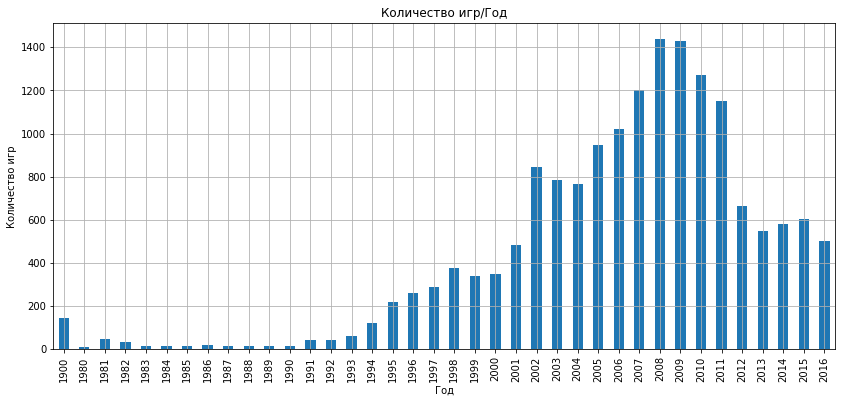

In [11]:
data.pivot_table(index='year_of_release',values='name',aggfunc='count').plot(kind='bar',legend=False,figsize=(14,6),grid=True,title='Количество игр/Год')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()
data = data.query('year_of_release>=1995')

### Комментарий
- Построим график что бы посмотреть сколько игр выпускалось в разные годы.График сильно скошен влево.Пик выпуска игр пришелся на 2008-2009 годы. Из графика видно, что большая часть игр выпускалась с 1995 года, для дальнейшего анализа возьмем период с 1995 по 2016.

In [12]:
top_platform = data.pivot_table(index=['platform','year_of_release'],values='sum_sales_all',aggfunc='sum').sort_values(['sum_sales_all'],ascending=False)
top_platform = top_platform.query('sum_sales_all>100').sort_values(['platform','year_of_release'],ascending=True)
top_platform

sum_sales_all
platform year_of_release               
DS       2005                    130.14
         2006                    119.81
         2007                    147.23
         2008                    145.36
         2009                    119.56
PS       1997                    136.17
         1998                    169.49
         1999                    144.53
PS2      2001                    166.43
         2002                    208.36
         2003                    193.05
         2004                    211.81
         2005                    160.66
         2006                    104.24
PS3      2008                    118.79
         2009                    130.93
         2010                    142.96
         2011                    157.98
         2012                    108.28
         2013                    113.25
PS4      2015                    118.90
Wii      2006                    140.19
         2007                    153.41
         2008                    177.68
         2009                    206.97
         2010                    128.67
X360     2008                    136.07
         2009                    120.82
         2010                    170.55
         2011                    145.23
         2012                    100.72

### Комментарий 
-Выберем платформы с наибольшими суммарными продажами по годам, возьмем только у которых суммарные продажи превышают 100 мил. копий

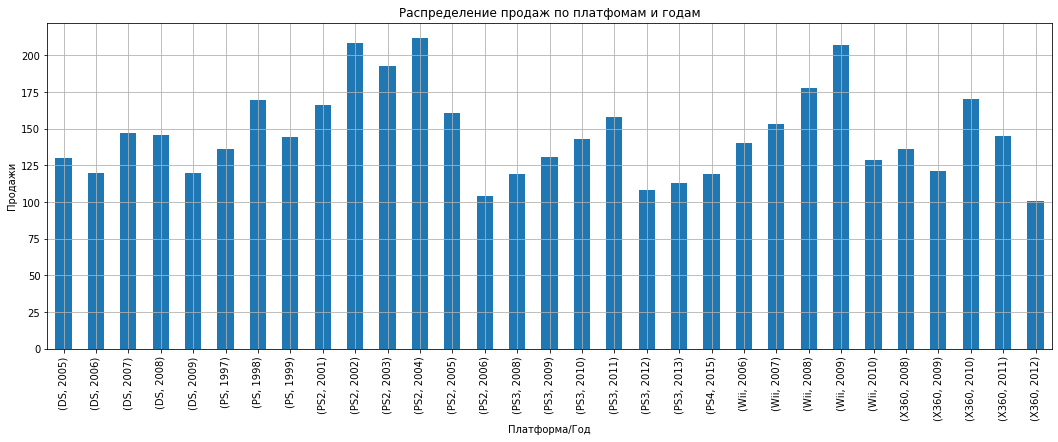

In [13]:
top_platform.plot(kind='bar',legend=False,figsize=(18,6),grid=True,title='Распределение продаж по платфомам и годам')
plt.xlabel("Платформа/Год")
plt.ylabel("Продажи")
plt.show()

### Комментерий
- Из графика видно что жизненый цикл платформы 3-5 лет, пик продаж игр приходится примерно на середину жизненного цикла, потом она обновляется, появляется новая, а интерес к старой платформе постепенно теряется.

### Для дальнейшего анализа нам потребуются данные только за 2015-2016 год, так как мы планируем компанию на 2017 год, нам нужны наиболее свежие данные по актульным играм и платфомам

In [14]:
data_current_period = data.query('year_of_release >= 2015')
data_current_period_pivot = data_current_period.pivot_table(index=['platform','year_of_release'],values='sum_sales_all',aggfunc='sum').sort_values('sum_sales_all',ascending=False)
data_current_period_pivot

sum_sales_all
platform year_of_release               
PS4      2015                    118.90
         2016                     69.25
XOne     2015                     60.14
3DS      2015                     27.78
XOne     2016                     26.15
PS3      2015                     16.82
WiiU     2015                     16.35
3DS      2016                     15.14
X360     2015                     11.96
PC       2015                      8.52
PSV      2015                      6.25
PC       2016                      5.25
WiiU     2016                      4.60
PSV      2016                      4.25
PS3      2016                      3.60
X360     2016                      1.52
Wii      2015                      1.14
         2016                      0.18
PSP      2015                      0.12

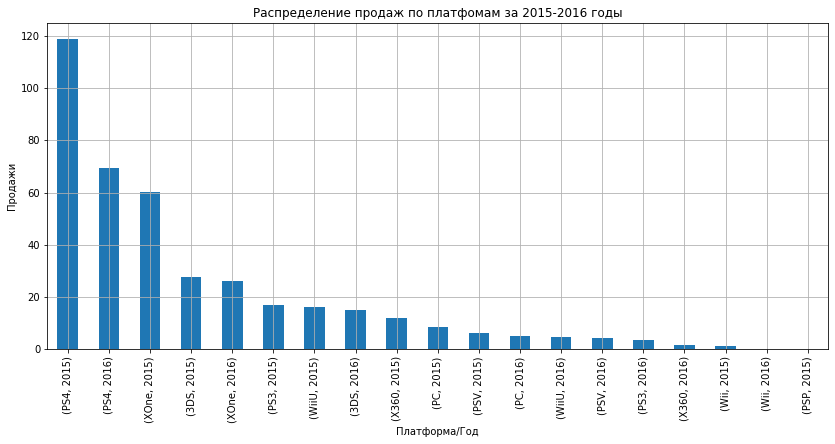

In [15]:
data_current_period_pivot.plot(kind='bar',legend=False,figsize=(14,6),grid=True,title='Распределение продаж по платфомам за 2015-2016 годы')
plt.xlabel('Платформа/Год')
plt.ylabel('Продажи')
plt.show()

### Комментарий
- На графике видно, что с большим отрывом лидируют в 2016 году по продажам PS4,XOne и 3DS, действительно это самые популярные приставки, у остальных платформ продажи в разы меньше. Хотя продажи по сравнению с 2015 годом упали у всех платформ, сильнее всего у PS4

In [16]:
data_current_period_top = data_current_period.pivot_table(index='platform',values='sum_sales_all',aggfunc='sum')
data_current_period_top_3 = data_current_period_top.sort_values('sum_sales_all',ascending=False)
data_current_period_top_3

,sum_sales_all
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


### Комментарий
- Три самые потенциально выгодные платформы PS4,XOne и 3DS, у них больше всего общих продаж игр

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 3)

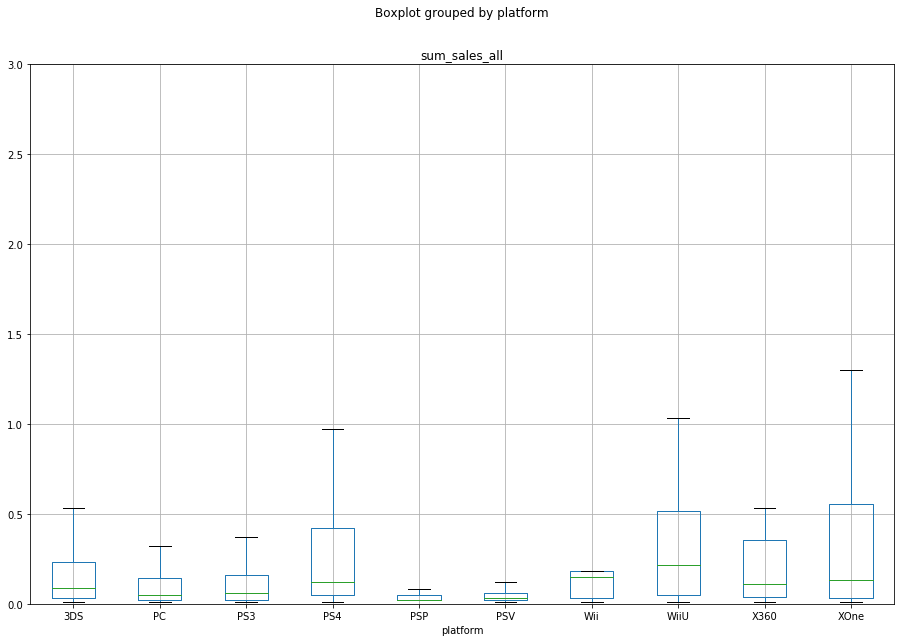

In [17]:
data_current_period.boxplot('sum_sales_all', by='platform', figsize=(15,10),showfliers = False).set_ylim(0, 3)

### Комментарий
- В данном случае выбросы говорят о том что есть большое количество игр продажи которых сильно выделяются на фоне общей массы игр, на каких то платформах их больше PS4, PS3, 3DS на каких то меньше xone,x360,wiiU

In [18]:
data_current_period_PS4 = data_current_period.query('platform == "PS4"')

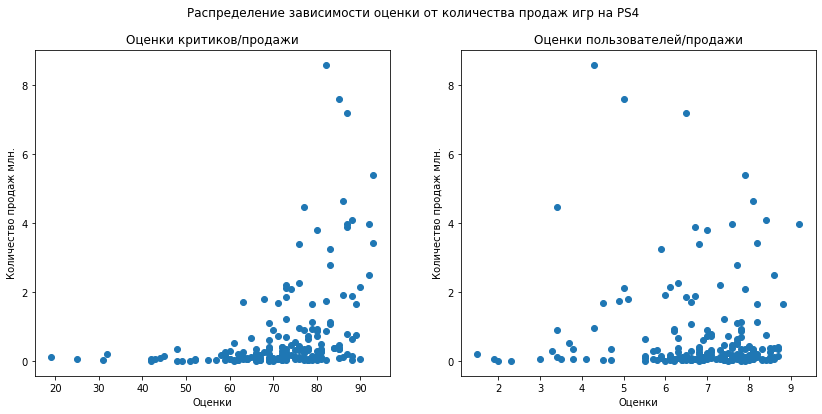

Коэффицент корреляции между отзывами критиков и продажами : 0.3928485555130601
Коэффицент корреляции между отзывами пользователей и продажами : -0.05973845712638215


In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle('Распределение зависимости оценки от количества продаж игр на PS4')

ax1.scatter(data_current_period_PS4['critic_score'],data_current_period_PS4['sum_sales_all'])
ax1.set_title('Оценки критиков/продажи')
ax1.set_xlabel('Оценки')
ax1.set_ylabel('Количество продаж млн.')

ax2.scatter(data_current_period_PS4['user_score'],data_current_period_PS4['sum_sales_all'])
ax2.set_title('Оценки пользователей/продажи')
ax2.set_xlabel('Оценки')
ax2.set_ylabel('Количество продаж млн.')
plt.show()
print('Коэффицент корреляции между отзывами критиков и продажами :',data_current_period_PS4['critic_score'].corr(data_current_period_PS4['sum_sales_all']))
print('Коэффицент корреляции между отзывами пользователей и продажами :',data_current_period_PS4['user_score'].corr(data_current_period_PS4['sum_sales_all']))

### Комментарий
- Связь между отзывами критиков и продажами прослеживается, но она слабая.Коэффицент корреляции между отзывами критиков и продажами 0.39
- Связь между отзывами пользователей отсутствует, так как коэффицент корреляции между отзывами пользователей и продажами равен -0.06
- Из этого можно сделать вывод что отзывы критиков на продажи влияют больше чем отзывы пользователей

In [20]:
print('Для XOne')
print('Коэффицент корреляции между отзывами критиков и продажами :',
      data_current_period.query('platform=="XOne"')['critic_score'].corr(data_current_period['sum_sales_all']))
print('Коэффицент корреляции между отзывами пользователей и продажами :',
      data_current_period.query('platform=="XOne"')['user_score'].corr(data_current_period['sum_sales_all']))

print('Для 3DS')
print('Коэффицент корреляции между отзывами критиков и продажами :',
      data_current_period.query('platform=="3DS"')['critic_score'].corr(data_current_period['sum_sales_all']))
print('Коэффицент корреляции между отзывами пользователей и продажами :',
      data_current_period.query('platform=="3DS"')['user_score'].corr(data_current_period['sum_sales_all']))

print('Для WiiU')
print('Коэффицент корреляции между отзывами критиков и продажами :',
      data_current_period.query('platform=="WiiU"')['critic_score'].corr(data_current_period['sum_sales_all']))
print('Коэффицент корреляции между отзывами пользователей и продажами :',
      data_current_period.query('platform=="WiiU"')['user_score'].corr(data_current_period['sum_sales_all']))

print('Для X360')
print('Коэффицент корреляции между отзывами критиков и продажами :',
      data_current_period.query('platform=="X360" & critic_score != "NaN"')['critic_score'].corr(data_current_period['sum_sales_all']))
print('Коэффицент корреляции между отзывами пользователей и продажами :',
      data_current_period.query('platform=="X360"')['user_score'].corr(data_current_period['sum_sales_all']))

print('Для PC')
print('Коэффицент корреляции между отзывами критиков и продажами :',
      data_current_period.query('platform=="PC"')['critic_score'].corr(data_current_period['sum_sales_all']))
print('Коэффицент корреляции между отзывами пользователей и продажами :',
      data_current_period.query('platform=="PC"')['user_score'].corr(data_current_period['sum_sales_all']))

print('Для PSV')
print('Коэффицент корреляции между отзывами критиков и продажами :',
      data_current_period.query('platform=="PSV"')['critic_score'].corr(data_current_period['sum_sales_all']))
print('Коэффицент корреляции между отзывами пользователей и продажами :',
      data_current_period.query('platform=="PSV"')['user_score'].corr(data_current_period['sum_sales_all']))

Для XOne
Коэффицент корреляции между отзывами критиков и продажами : 0.43088874582136805
Коэффицент корреляции между отзывами пользователей и продажами : -0.04146733387366271
Для 3DS
Коэффицент корреляции между отзывами критиков и продажами : 0.17757455046092874
Коэффицент корреляции между отзывами пользователей и продажами : 0.19879627008102982
Для WiiU
Коэффицент корреляции между отзывами критиков и продажами : 0.317045711769622
Коэффицент корреляции между отзывами пользователей и продажами : 0.3635185724809445
Для X360
Коэффицент корреляции между отзывами критиков и продажами : nan
Коэффицент корреляции между отзывами пользователей и продажами : -0.2813082274094897
Для PC
Коэффицент корреляции между отзывами критиков и продажами : 0.3773317477241351
Коэффицент корреляции между отзывами пользователей и продажами : 0.15038053045029076
Для PSV
Коэффицент корреляции между отзывами критиков и продажами : 0.0036040833609397678
Коэффицент корреляции между отзывами пользователей и продажами

### Комментарий
- На других платфомах связи разные, например на XOne она похожа на PS4, но на платформах 3DS,WiiU,PC связь между отзывами пользователей и продажами слабая но есть, а на PSV оценки не влияют на продажи. В некоторых случаях коэффицент корреляции посчитать не удается, так как полностью отсутствуют оценки

In [21]:
data_current_period_genre = data_current_period.pivot_table(index=['genre'],values='sum_sales_all',aggfunc=['count','sum','mean'])
data_current_period_genre.columns = ['count','sum_sales_all','mean']
data_current_period_genre.sort_values('sum_sales_all',ascending=False)

,count,sum_sales_all,mean
genre,,,
Shooter,81,105.73,1.305309
Action,431,102.13,0.236961
Sports,107,64.33,0.601215
Role-Playing,132,55.82,0.422879
Misc,71,14.17,0.199577
Fighting,37,12.37,0.334324
Adventure,110,11.98,0.108909
Racing,42,10.86,0.258571
Platform,28,9.28,0.331429


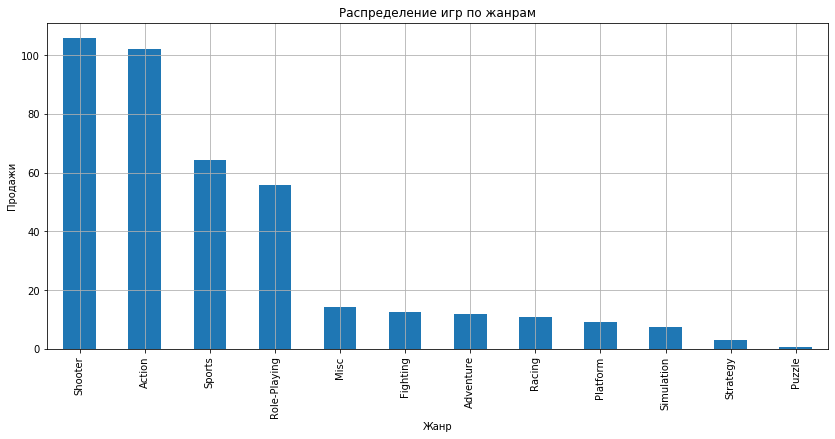

In [22]:
data_current_period.pivot_table(index='genre',values='sum_sales_all',aggfunc='sum').sort_values('sum_sales_all',ascending=False).plot(kind='bar',legend = False,figsize=(14,6),grid=True,title='Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

### Комметнарий
- Больше всего игр по количеству проданно в жанрах Action,Role-Playing,Adventure и Sports. Но больше всего прибыли принесли Shooter и Action. Из этого можно сделать вывод что в жанре Action игр продается больше и они приносят отличную прибыль
- Самые низкие суммы и количество продажи у Strategy и Puzzle их не выгодно продавать

## Шаг 4.  Портрет пользователя каждого региона

In [23]:
top_platform = data_current_period.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales','sum_sales_all'],aggfunc='sum').sort_values('sum_sales_all',ascending=False).head()
top_platform['part_eu'] = round(top_platform['eu_sales']*100/top_platform['eu_sales'].sum(),1)
top_platform['part_jp'] = round(top_platform['jp_sales']*100/top_platform['jp_sales'].sum(),1)
top_platform['part_na'] = round(top_platform['na_sales']*100/top_platform['na_sales'].sum(),1)
top_platform

,eu_sales,jp_sales,na_sales,sum_sales_all,part_eu,part_jp,part_na
platform,,,,,,,
PS4,83.54,12.05,63.86,188.15,62.9,26.9,45.9
XOne,28.10,0.18,50.30,86.29,21.2,0.4,36.2
3DS,7.39,23.55,10.31,42.92,5.6,52.5,7.4
WiiU,6.49,4.12,8.86,20.95,4.9,9.2,6.4
PS3,7.30,4.97,5.66,20.42,5.5,11.1,4.1


### Комментарий
- Выведем отдельные столбцы по каждому региону в которых укажем долю продаж по каждой платформе в процентах 
- В Европе самой большой популярностью пользуются игры для PS4 ее доля почти 63%, на втором месте XOne с долей 21% остальное делят между собой 3DS,WiiU и PS3
- В Японии же лидирует 3DS ее доля 52.5% на втором месте PS4 26.9% на третьем PS3 11.1%
- В Северной Америке основные продажи приходятся на PS4 и XOne по 45,9% и 36.2% соответственно
- PS4 в каждом регионе показывает отличные результаты по продажам игр

In [24]:
top_genre = data_current_period.pivot_table(index='genre',values=['na_sales','eu_sales','jp_sales','sum_sales_all'],aggfunc='sum').sort_values('sum_sales_all',ascending=False).head()
top_genre['part_eu'] = round(top_genre['eu_sales']*100/top_genre['eu_sales'].sum(),1)
top_genre['part_jp'] = round(top_genre['jp_sales']*100/top_genre['jp_sales'].sum(),1)
top_genre['part_na'] = round(top_genre['na_sales']*100/top_genre['na_sales'].sum(),1)

top_genre

,eu_sales,jp_sales,na_sales,sum_sales_all,part_eu,part_jp,part_na
genre,,,,,,,
Shooter,40.28,3.79,48.18,105.73,32.4,8.4,36.1
Action,34.82,23.05,33.68,102.13,28.0,51.1,25.2
Sports,27.82,1.65,26.31,64.33,22.4,3.7,19.7
Role-Playing,17.21,13.41,19.82,55.82,13.8,29.7,14.8
Misc,4.26,3.19,5.58,14.17,3.4,7.1,4.2


### Комментарий
- В Европе преобладают жанры Shooter,Action,Sports, 32.4,28.0,22.4 процентов соответственно
- В Японии же лидируют Action и Role-Playing 51.1 и 29.7 процентов соответственно
- В Северной Америке лидируют те же жанры что и в Европе
- Жанр Action показывает отличные результаты по продажам игр в каждом регионе

In [25]:
data_current_period.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,34.83,5.25,26.59
E10+,11.54,3.27,17.87
M,45.54,4.29,47.03
T,20.32,7.70,22.86
undefined,35.71,32.89,37.44


### Комментарий
- В Европе и Северной Америке преобладают продажи игр с рейтингом М - «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет и E - «Для всех», меньше с рейтингом E10+ - «Для всех от 10 лет и старше»
- В Японии связь меньше там преобладает рейтинг Т - «Подросткам»: Игра подходит для лиц от 13 лет
- Игры не имеющие рейтинг занимают существенную долю продаж в каждом из регионов, распределение по регонам примерно одинаково

## Шаг 5. Проверим гипотезы

Нужно проверить две гипотизы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

- Для проверки гипотизы выбираем Критерий Стьюдента, так как он позволяет сравнивать средние значения двух выборок и на основе результатов теста делать заключение о том, различаются ли они друг от друга статистически или нет.

Проверим первую гипотизу.Сформулируем нулевую гипотезу,средние пользовательские рейтинги платформ Xbox One и PC **НЕ одинаковые**, тогда альтернативная гипотеза и будет та что мы проверяем, то есть средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод scipy.stats.ttest_ind.  

In [26]:
xone = data_current_period.query('platform == "XOne"')['user_score']
pc = data_current_period.query('platform == "PC"')['user_score']

alpha = 0.05

results = st.ttest_ind(xone,pc,nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.2778542084733873
Не получилось отвергнуть нулевую гипотезу


### Вывод
-Полученное значение p-value говорит нам о том что средние пользовательские рейтинги платформ Xbox One и PC  разные.Не получилось отвергнуть нулевую гипотезу

Проверим вторую гипотизу.Сформулируем нулевую гипотезу,средние пользовательские рейтинги жанров Action и Sports **одинаковые**, тогда альтернативная гипотеза и будет та что мы проверяем, то есть средние пользовательские рейтинги жанров Action и Sports **разные**. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод scipy.stats.ttest_ind.  

In [27]:
sports = data_current_period.query('genre == "Sports"')['user_score']
action = data_current_period.query('genre == "Action"')['user_score']

alpha = 0.05

results = st.ttest_ind(sports,action,nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.0012846807938715e-13
Отвергаем нулевую гипотезу


### Вывод
- Полученное значение p-value говорит нам о том что ссредние пользовательские рейтинги жанров Action и Sports разные.Отвергаем нулевую гипотезу

## Шаг 6. Общий вывод

На основе анализа данных о продажах игр можно сделать вывод что для разных регионов(Европа,Япония и Северная Америка) потенциально популярный продукт может отличаться, так в 2017 году:
- На рынке Японии ставку лучше сделать на игры для платформы 3DS и PS4 и на игры в жанре Action и Role-Playing, так как они самые популярные в этой стране и приносят больше прибыли
- На рынке Европы ставку лучше сделать на игры для платформы PS4 и XOne и на игры в жанре Shooter,Action,Sports, так как они самые популярные в этой стране и приносят больше прибыли
- На рынке Северной Америки ставку лучше сделать так же как и в Европе на игры для платформы PS4 и XOne и на игры в том же жанре, так как они самые популярные в этой стране и приносят больше прибыли
- Общее у рынков этих стран это то что везде очень популярна PS4 и игры в жанре Action

**На успешность игры влияет платформа, для которой она выпущена, жанр и рейтинг.
На основе анализа данных за 2015-2016 гг. для отдела маркетинга я бы рекомендовал сделать ставку в рекламной кампании на 2017 г. на самые популярные платформы: PS4, 3DS и XOne, и на жанры игр Action, Shooter. Также следует обратить внимание на рейтинг ESRB: он влияет на продажи по регионам.**